Lending Club Loan Data Analysis

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Dataset columns and definition:

 
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- installment: The monthly installments owed by the borrower if the loan is funded.

- log.annual.inc: The natural log of the self-reported annual income of the borrower.

- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- fico: The FICO credit score of the borrower.

- days.with.cr.line: The number of days the borrower has had a credit line.

- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1. Feature Transformation

 - Transform categorical values into numerical values (discrete)

2. Exploratory data analysis of different factors of the dataset.

3. Additional Feature Engineering

 - You will check the correlation between features and will drop those features which have a strong correlation. This will help reduce the number of features and will leave you with the most relevant features

4. Modeling

 - After applying EDA and feature engineering, you are now ready to build the predictive models

 - In this part, you will create a deep learning model using Keras with Tensorflow backend

Setting up the Environment

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [2]:
print("Numpy: ",np.__version__)
print("Pandas: ",pd.__version__)
print("TensorFlow: ",tf.__version__)
print("Keras: ",keras.__version__)
print("Seaborn: ",sns.__version__)

Numpy:  1.18.1
Pandas:  1.0.3
TensorFlow:  2.1.0
Keras:  2.3.1
Seaborn:  0.10.1


Reading the dataset

In [34]:
data = pd.read_csv("loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Describing the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


 Feature Transformation - Transform categorical values into numerical values (discrete)

In [5]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['purpose'])
np.unique(le.transform(data['purpose']))

array([0, 1, 2, 3, 4, 5, 6])

In [7]:
data['purpose'] = le.fit_transform(data['purpose'])
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
data.shape

(9578, 14)

In [39]:
data = pd.get_dummies(data, columns=['purpose'])
data.shape

(9578, 20)

In [45]:
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


C:\Users\nic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nic\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


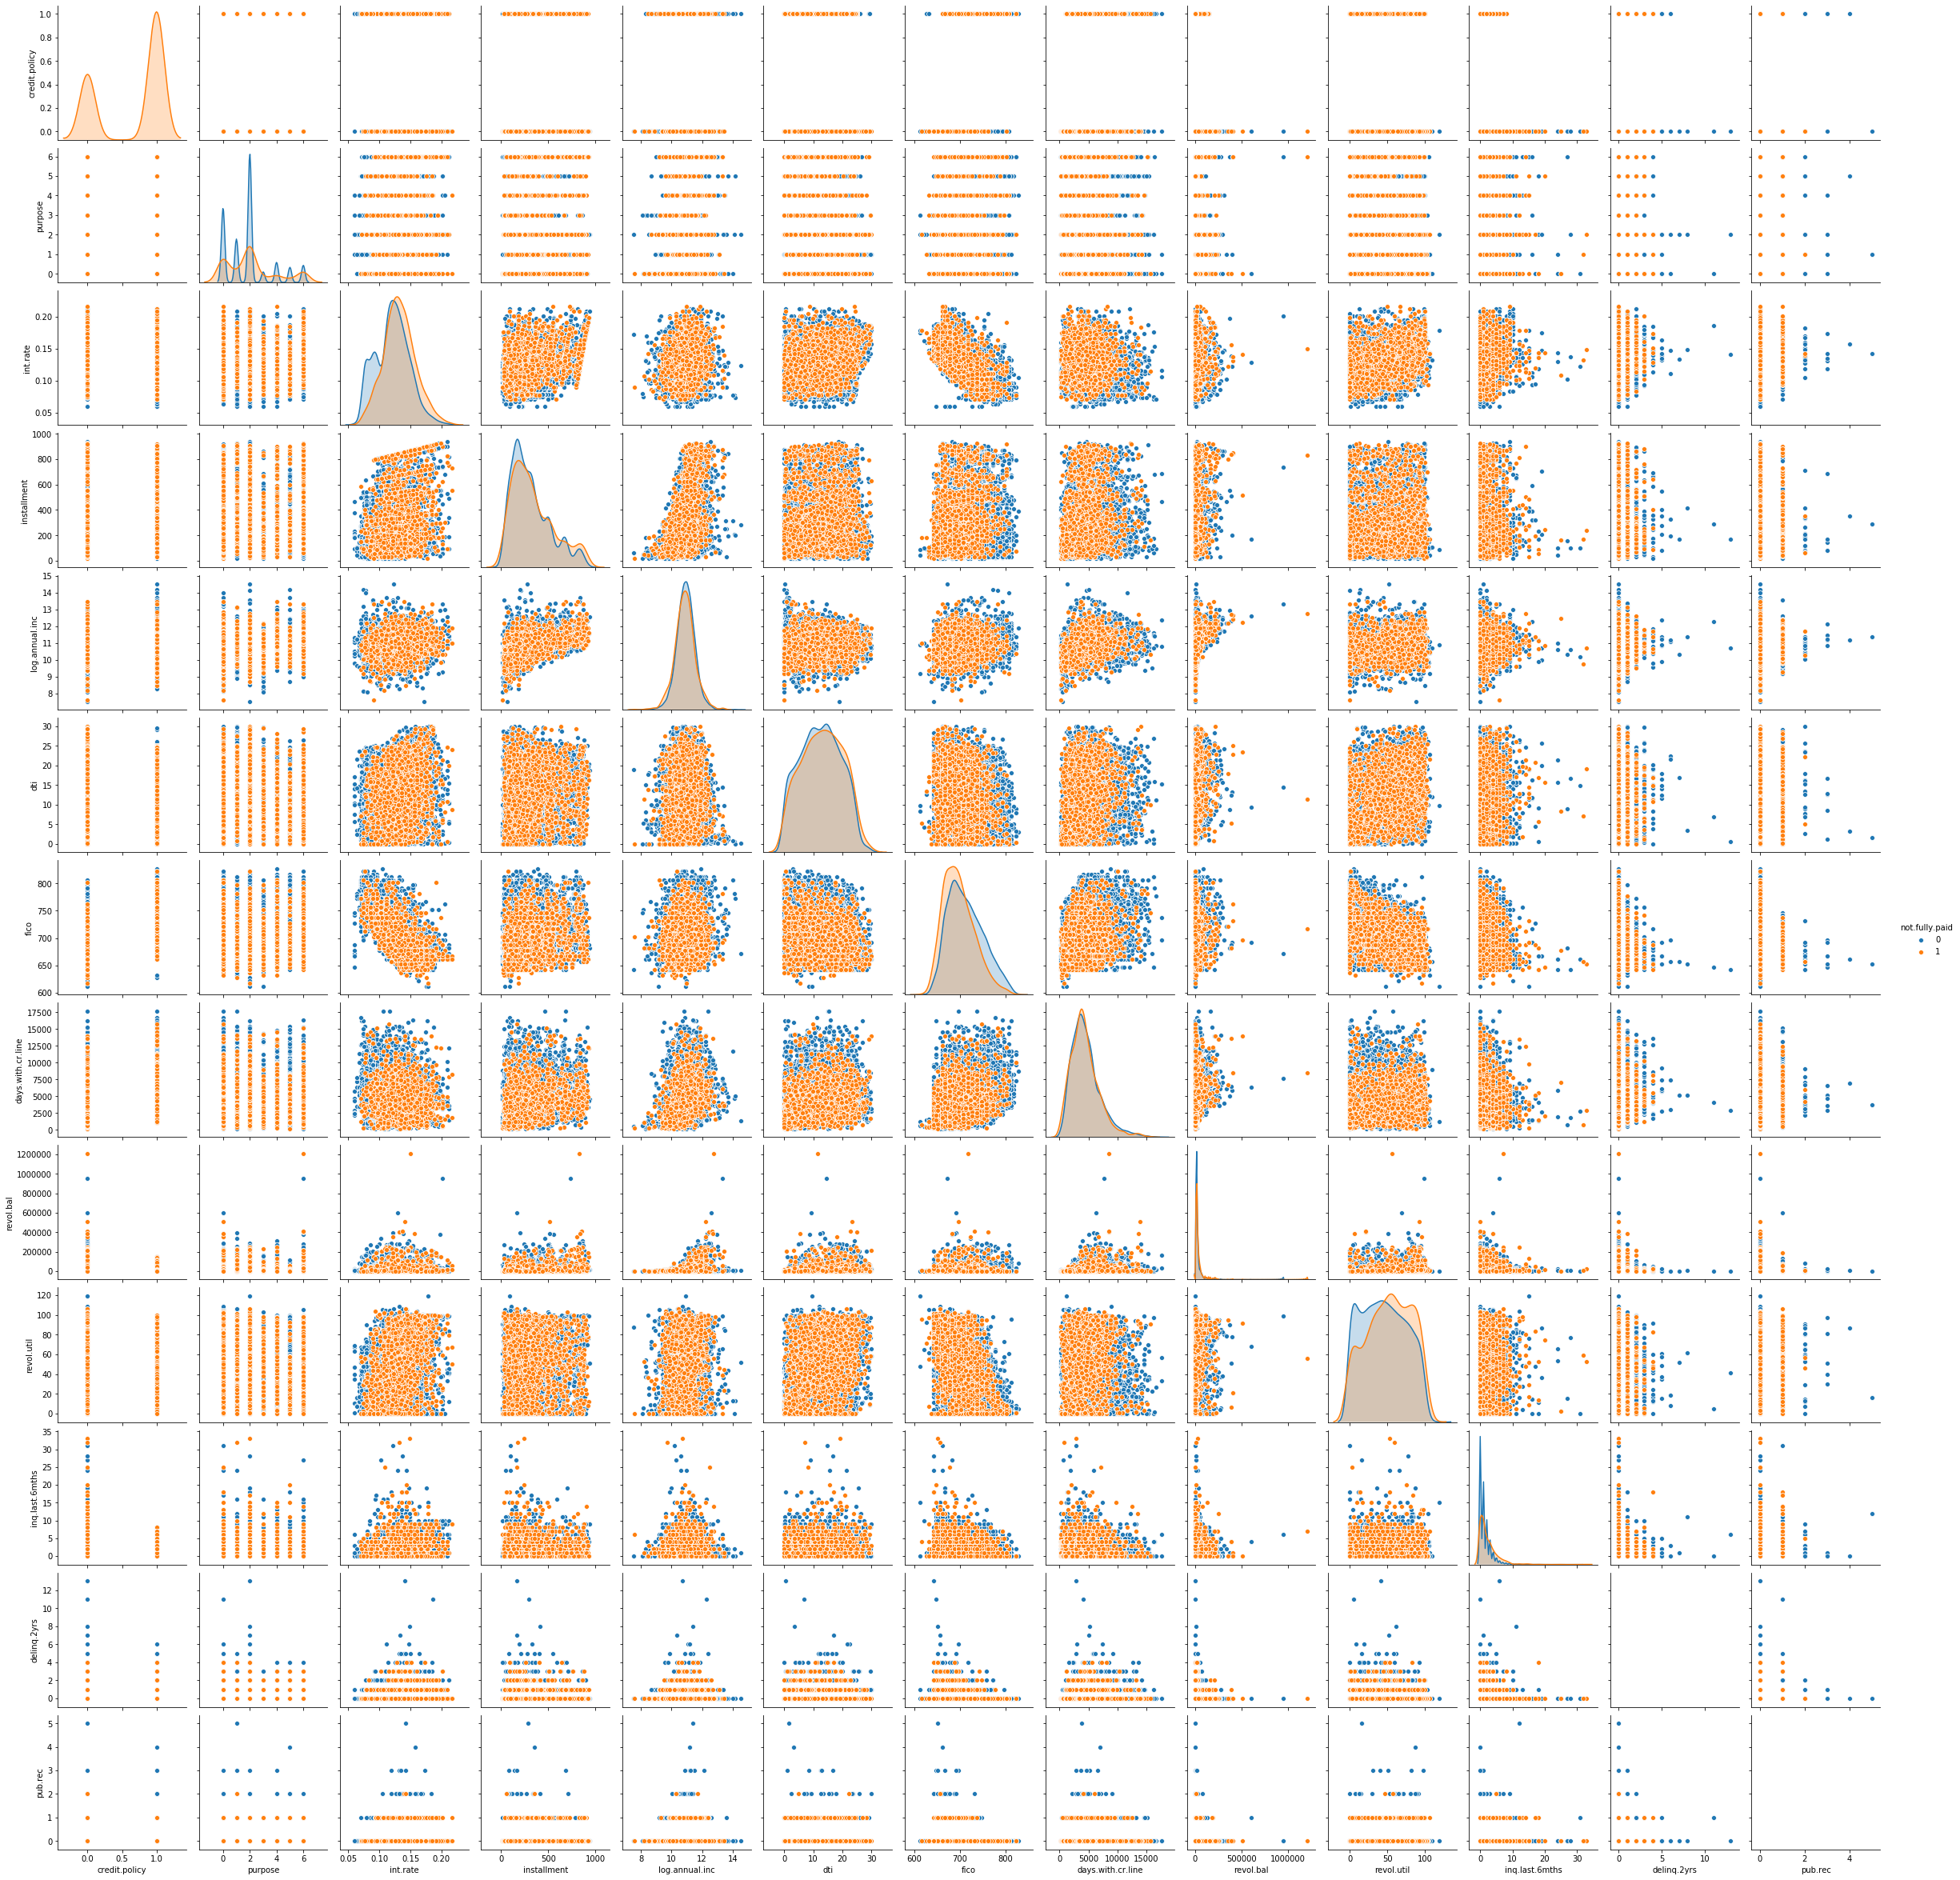

In [9]:
sns.pairplot(data=data, hue='not.fully.paid')

In [93]:
X, y = data.drop(columns=['not.fully.paid', 'purpose_small_business']), data['not.fully.paid']
(X.shape, y.shape)

((9578, 18), (9578,))

In [94]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0


In [107]:
1 - y.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [102]:
y_not = 1 - y
y_not

0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: not.fully.paid, Length: 9578, dtype: int64

In [108]:
X = np.loadtxt("input.csv", delimiter=",", ndmin=2).astype(np.float32)
X.shape

(9578, 18)

In [109]:
y = np.loadtxt("output.csv", delimiter=",", ndmin=2).astype(np.float32)
y.shape

(9578, 2)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train Shape: {}".format(X_train.shape))
print("X_test Shape: {}".format(X_test.shape))
print("y_train Shape: {}".format(y_train.shape))
print("y_test Shape: {}".format(y_test.shape))

X_train Shape: (7183, 18)
X_test Shape: (2395, 18)
y_train Shape: (7183, 2)
y_test Shape: (2395, 2)


In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential();

classifier.add(Dense(12, input_dim=18, activation='relu'))

classifier.add(Dense(18, activation='relu'))

classifier.add(Dense(2, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train, y_train, batch_size=10, epochs=100)

scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Epoch 1/100
7183/7183 [==============================] - 1s 72us/step - loss: 0.2724 - accuracy: 0.8920
Epoch 2/100
7183/7183 [==============================] - 0s 62us/step - loss: 0.1437 - accuracy: 0.9358
Epoch 3/100
7183/7183 [==============================] - 0s 61us/step - loss: 0.1306 - accuracy: 0.9448
Epoch 4/100
7183/7183 [==============================] - 0s 61us/step - loss: 0.1247 - accuracy: 0.9484
Epoch 5/100
7183/7183 [==============================] - 0s 60us/step - loss: 0.1209 - accuracy: 0.9508
Epoch 6/100
7183/7183 [==============================] - 0s 60us/step - loss: 0.1181 - accuracy: 0.9527
Epoch 7/100
7183/7183 [==============================] - 0s 60us/step - loss: 0.1155 - accuracy: 0.9548
Epoch 8/100
7183/7183 [==============================] - 0s 60us/step - loss: 0.1133 - accuracy: 0.9572
Epoch 9/100
7183/7183 [==============================] - 0s 61us/step - loss: 0.1120 - accuracy: 0.9564
Epoch 10/100
7183/7183 [==============================] - 0s 60u

7183/7183 [==============================] - 0s 59us/step - loss: 0.0888 - accuracy: 0.9657
Epoch 80/100
7183/7183 [==============================] - 0s 61us/step - loss: 0.0880 - accuracy: 0.9659
Epoch 81/100
7183/7183 [==============================] - 0s 59us/step - loss: 0.0877 - accuracy: 0.9642
Epoch 82/100
7183/7183 [==============================] - 0s 61us/step - loss: 0.0880 - accuracy: 0.9652
Epoch 83/100
7183/7183 [==============================] - 0s 58us/step - loss: 0.0880 - accuracy: 0.9644
Epoch 84/100
7183/7183 [==============================] - 0s 59us/step - loss: 0.0877 - accuracy: 0.9642
Epoch 85/100
7183/7183 [==============================] - 0s 58us/step - loss: 0.0868 - accuracy: 0.9660
Epoch 86/100
7183/7183 [==============================] - 0s 59us/step - loss: 0.0872 - accuracy: 0.9646
Epoch 87/100
7183/7183 [==============================] - 0s 60us/step - loss: 0.0868 - accuracy: 0.9661
Epoch 88/100
7183/7183 [==============================] - 0s 58us/st